# Figure 1: Mean Squared Error as a function of the samples per site and sites

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# df = pd.read_csv('../outputs/fig1_5000samples.csv')
df = pd.read_csv('../outputs/fig1a_10000sim_summary.csv')
df

,Unnamed: 0,Unnamed: 1,error_angle_mean,error_angle_median,error_angle_25,error_angle_75,error_angle_95,error_angle_std,error_angle_S2,error_vgp_scatter,...,N,n0,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers,total_simulations
0,0,0,4.147206,3.912595,2.484667,5.486852,8.148171,2.186134,21.978023,3.186314,...,13,2,50,30.0,0.0,0.0,G,NaN,False,10000
1,1,0,4.725067,4.445762,2.876439,6.279026,9.143663,2.455932,28.357256,2.932066,...,7,27,50,30.0,0.0,0.0,G,NaN,False,10000
2,2,0,3.980893,3.739991,2.413162,5.281213,7.779722,2.085578,20.196707,2.438957,...,10,19,50,30.0,0.0,0.0,G,NaN,False,10000
3,3,0,3.233462,3.013762,1.950203,4.281603,6.409835,1.715021,13.396281,5.554613,...,29,1,50,30.0,0.0,0.0,G,NaN,False,10000
4,4,0,2.158836,2.034649,1.311973,2.846312,4.181181,1.125675,5.927591,1.309937,...,37,8,50,30.0,0.0,0.0,G,NaN,False,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,754,0,2.649010,2.473473,1.605169,3.503009,5.164014,1.387456,8.942095,1.581143,...,24,11,50,30.0,0.0,0.0,G,NaN,False,10000
755,755,0,2.606820,2.440106,1.561114,3.462770,5.143039,1.368585,8.668347,1.647996,...,27,5,50,30.0,0.0,0.0,G,NaN,False,10000
756,756,0,2.316476,2.175341,1.420605,3.062309,4.489364,1.200979,6.808266,1.450202,...,34,5,50,30.0,0.0,0.0,G,NaN,False,10000
757,757,0,6.289641,5.932100,3.841007,8.335166,12.206067,3.266839,50.230759,4.174381,...,4,23,50,30.0,0.0,0.0,G,NaN,False,10000


### Plot Function

In [221]:
from scipy.ndimage.filters import gaussian_filter

def plot_angle_error(df, df_in=None, save_plot=True):
    
    fig, axes = plt.subplots()
    fig.set_size_inches(16, 16)
    axes.set_aspect("equal")
    
    caxes    = axes.inset_axes([1.04, 0.02, 0.03, 0.4])
    caxes_in = axes.inset_axes([1.04, 0.53, 0.03, 0.4])
    
    # caxes    = axes.inset_axes([0.03, -0.04, 0.4, 0.03])
    # caxes_in = axes.inset_axes([0.53, -0.04, 0.4, 0.03])

    def contour_plot(df_, ax, cax, bounds, cmap, cbar_title, make_levels=True, make_contours=True, color_max=16, ticks=None):
    
        X = df_.columns.values
        Y = df_.index.values
        Z = df_.values
        Z_smooth = gaussian_filter(Z, 1.0)
    
        Z = np.clip(Z, a_min=0.0, a_max=color_max)
        Z_rounded = np.rint(Z)

        x,y = np.meshgrid(X, Y)

        if make_levels:
            N = x * y
            levels = np.hstack([np.arange(0.0, 100.0, 20), np.arange(100.0, 310, 40.)])
            IsoNLines = ax.contour(x, y, N, 10, colors='white', linestyles="dashed", levels=levels)
            ax.clabel(IsoNLines, inline=True, fontsize=10)

        ColorGrid = ax.pcolormesh(x, y, Z_rounded, cmap=cmap, alpha=0.8, vmin=0, vmax=color_max)
        
        if make_contours:
            ContourLines = ax.contour(x, y, Z, 10, colors='k', levels=bounds)  
            ax.clabel(ContourLines, inline=True, fontsize=14)

        ax.set_xlim([0, np.max(df_.columns.values)])
        ax.set_ylim([0, np.max(df_.index.values)])
        ax.set_xlabel('Number of Samples per Site ($n_0$)', fontsize=18)
        ax.set_ylabel('Number of Sites (N)', fontsize=18)
        ax.set_xticks(ticks)
        ax.set_yticks(ticks)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
    
        cbar = plt.colorbar(ColorGrid, cax=cax, boundaries=bounds, orientation='vertical')#, fraction=0.02, location='right')
        cbar.set_label(cbar_title, rotation=270, fontsize=20, labelpad=20)
     
        return None
    
    contour_plot(df, 
                 axes, 
                 cax=caxes,
                 bounds=np.hstack([np.arange(0.0, 5.0, 0.5), np.arange(5.0, 8, 1.0), np.arange(8.0, 16.0, 2.0)]), 
                 cmap='viridis', 
                 cbar_title="RMSE for true pole",
                 color_max=14, 
                 ticks=[1, 2, 4, 7, 10, 15, 20, 25, 30, 35, 40])
    
    if df_in is not None:
    
        axin = axes.inset_axes([0.45, 0.45, 0.54, 0.54])
        axin.plot([1,2], [3,4])
        contour_plot(df_in, 
                     axin, 
                     cax=caxes_in,
                     bounds=np.hstack([np.arange(0.0, 4.0, 0.5), np.arange(5.0, 12, 1.0)]), 
                     cmap='inferno', 
                     cbar_title="RMSE for VGP scatter",
                     make_levels=False, 
                     make_contours=False,
                     color_max=10, 
                     ticks=[1, 5, 10, 20, 30, 40])
        
    if save_plot:
        plt.savefig("Figure1.png", dpi=300, format="png", bbox_inches='tight')
        plt.savefig("Figure1.pdf", format="pdf", bbox_inches='tight')
    else: 
        plt.show()

/tmp/ipykernel_666/2709485016.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [222]:
all_kappa = np.unique(df.kappa_within_site.values)

df_filter = df[(df.site_lat==30) 
             & (df.kappa_within_site==50)
             & (df.outlier_rate==0.00) 
             & (df.ignore_outliers==False)]

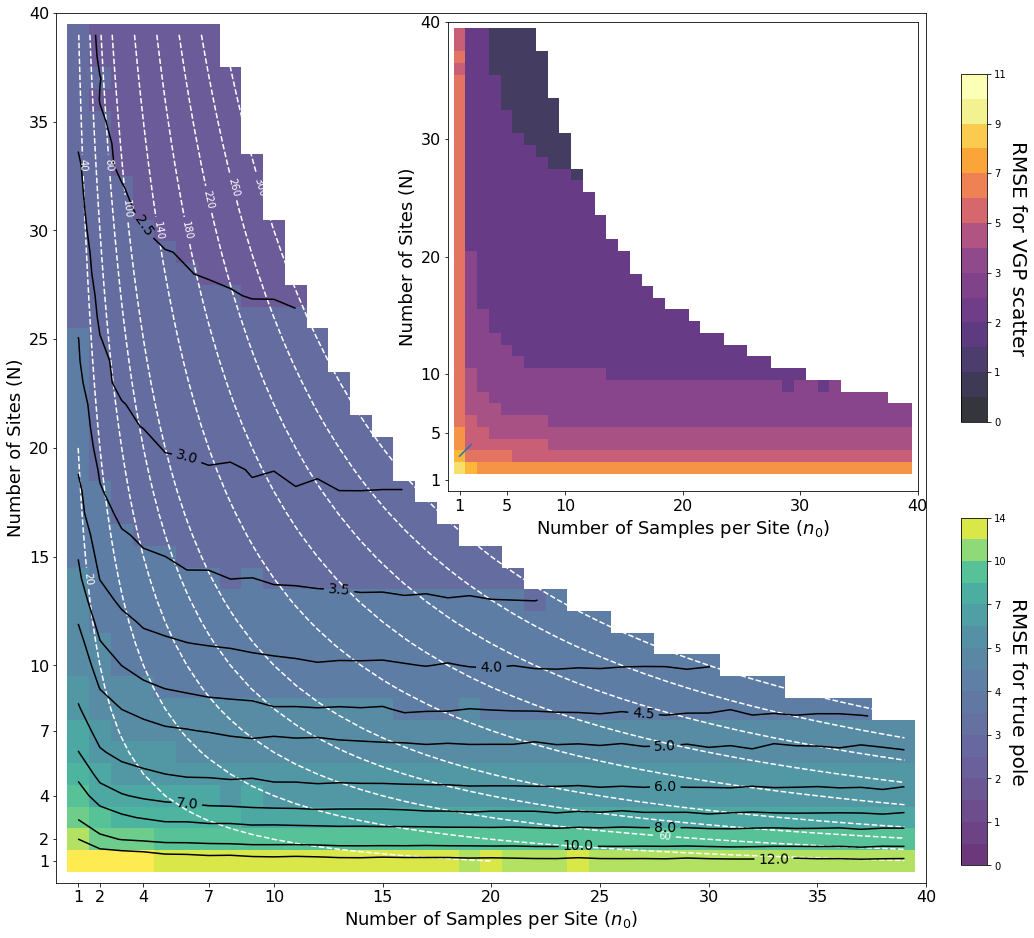

In [223]:
plot_angle_error(df_filter.pivot('N', 'n0', 'error_angle_mean'), 
                 df_filter.pivot('N', 'n0', 'error_vgp_scatter'),
                 save_plot=True)

In [149]:
df_filter.pivot('N', 'n0', 'error_vgp_scatter')

n0,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,39
N,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.427659,7.961171,7.319502,7.139760,6.896738,6.942550,6.860261,6.815864,6.836723,6.818633,...,6.624784,6.660566,6.615155,6.703557,6.622687,6.627279,6.630663,6.627442,6.627455,6.636688
3,7.781347,6.361170,5.914543,5.637910,5.587974,5.460805,5.354799,5.289394,5.339272,5.285987,...,5.055932,5.009665,4.977274,4.967701,4.940801,4.930922,4.966336,4.884805,4.901376,4.969775
4,7.118025,5.428047,5.121615,4.902540,4.728608,4.623343,4.521940,4.512867,4.436470,4.428894,...,4.087968,4.146713,4.112229,4.074880,4.080887,4.090660,4.086721,4.091379,4.059055,4.005337
5,6.785919,5.003037,4.523866,4.386635,4.163133,4.028654,3.995574,3.896972,3.849107,3.814925,...,3.597290,3.561054,3.575847,3.567932,3.509089,3.509821,3.523463,3.543712,3.504925,3.513618
6,6.468871,4.641900,4.208280,3.919506,3.774307,3.689700,3.586651,3.513003,3.458789,3.446427,...,3.250126,3.225832,3.193977,3.218298,3.176470,3.178502,3.169817,3.169693,3.201443,3.157842
7,6.294250,4.307210,3.899277,3.576636,3.422859,3.317320,3.215704,3.176720,3.156312,3.107719,...,2.938582,2.918415,2.930664,2.904030,2.902370,2.899121,2.909222,2.909407,2.905808,2.901766
8,6.189650,4.116492,3.580387,3.296527,3.194560,3.100272,3.023469,2.944657,2.911190,2.884853,...,2.703438,2.720531,2.735421,2.691594,2.688189,2.699021,2.710601,2.712703,NaN,NaN
9,6.086755,3.890919,3.310888,3.117042,2.969849,2.850038,2.784924,2.744884,2.737509,2.703517,...,2.527313,2.512148,2.495174,2.512779,NaN,NaN,NaN,NaN,NaN,NaN


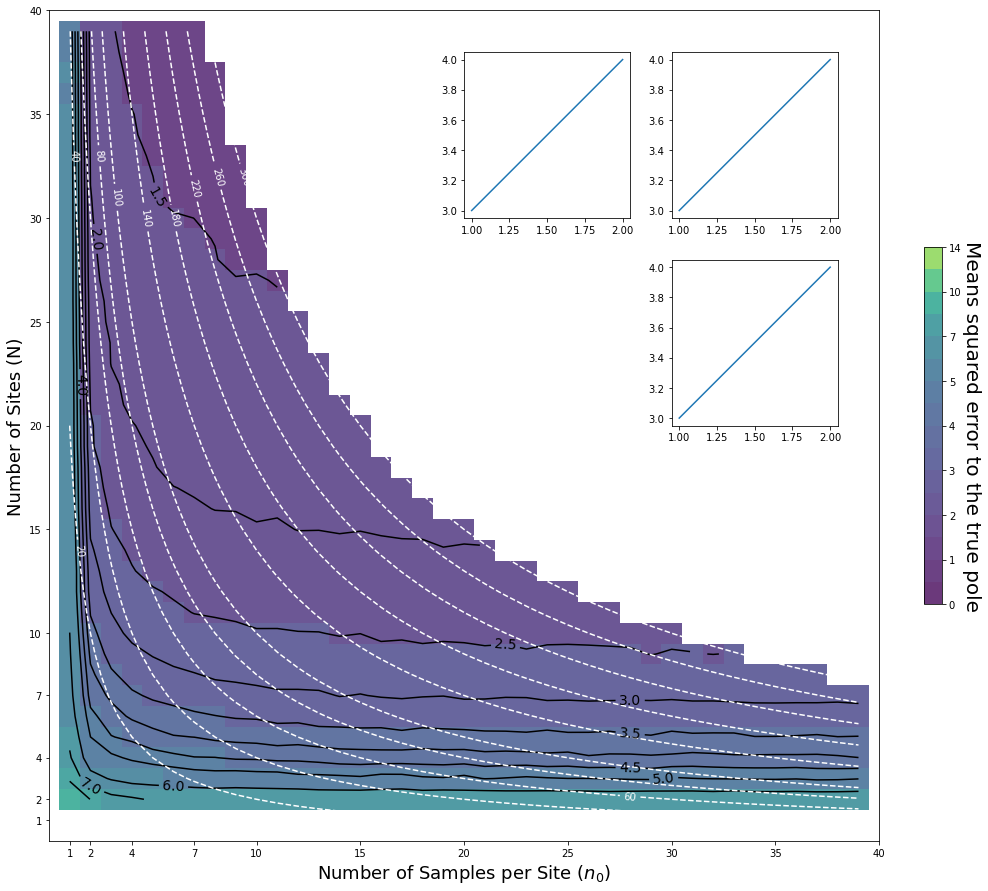

In [10]:
contour_from_pandas(df_filter.pivot('N', 'n0', 'error_vgp_scatter'), save_plot=False)

## Theoretical comparision

We can compare this with the theoretical approximations we obtained.

In [32]:
df_filter["error_kappa_theoretical"] = df_filter.apply(lambda row: smp.kappa_theoretical(smp.Params(N=row.N, 
                                                                                                n0=row.n0, 
                                                                                                kappa_within_site=row.kappa_within_site,
                                                                                                site_lat=row.site_lat,
                                                                                                site_long=row.site_long, 
                                                                                                outlier_rate=row.outlier_rate, 
                                                                                                secular_method=row.secular_method, 
                                                                                                kappa_secular=row.kappa_secular)), axis=1)
    
df_filter["error_angle_theoretical"] = df_filter.apply(lambda row: smp.kappa2angular(row.error_kappa_theoretical), axis=1)
df_filter["error_angle_S"] = df_filter["error_angle_S2"] ** .5

df_filter["error_theoretical_relative"] = df_filter.apply(lambda row: (row.error_angle_theoretical-row.error_angle_S) / row.error_angle_S, axis=1)
df_filter[['N', 'n0', 'error_angle_mean', 'error_angle_S', 'error_angle_theoretical', 'error_theoretical_relative']]

,N,n0,error_angle_mean,error_angle_S,error_angle_theoretical,error_theoretical_relative
0,13,2,4.147206,4.688072,4.654499291544658,-0.007161
1,7,27,4.725067,5.325153,5.3613434272699445,0.006796
2,10,19,3.980893,4.494075,4.499750187747716,0.001263
3,29,1,3.233462,3.660093,3.5577113056347636,-0.027972
4,37,8,2.158836,2.434664,2.4332626499978933,-0.000576
...,...,...,...,...,...,...
754,24,11,2.649010,2.990334,2.978614000648926,-0.003919
755,27,5,2.606820,2.944206,2.917974783751265,-0.008909
756,34,5,2.316476,2.609265,2.6018443872571515,-0.002844
757,4,23,6.289641,7.087366,7.1157637353235765,0.004007


(array([  7.,  11.,  10.,  21.,  89., 218., 249., 116.,  32.,   6.]),
 array([-0.038706925068676, -0.032624145074327, -0.026541365079978,
        -0.020458585085629, -0.01437580509128 , -0.008293025096932,
        -0.002210245102583,  0.003872534891766,  0.009955314886115,
         0.016038094880464,  0.022120874874813]),
 <BarContainer object of 10 artists>)

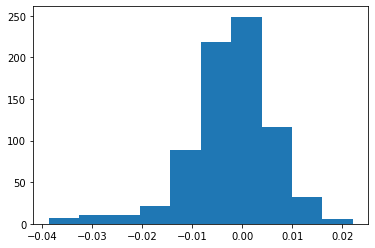

In [33]:
plt.hist(df_filter.error_theoretical_relative)